<a href="https://colab.research.google.com/github/pinkdolphin11/ESAA/blob/main/HW_1202_CNN_142~.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 4. 합성곱 신경망(CNN)

## 01. 합성곱 신경망

* CNN(Convolutional Neural Network) : 데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로, 컴퓨터 비전 분야에서 많이 사용됨

  * 이미지 분류 : 모델이 이미지를 인식할 수 있는 능력을 갖춤

  * 객체 탐지 : 이미지에서 특정한 객체를 인식하고 위치 파악. 인식한 객체가 어떤 클래스에 속하는지 분류 확률과 예측을 함께 알려줌. 객체의 위치는 이미지의 좌표 값으로 나타내므로, 회귀분석으로 bounding box(객체 위치에 표시된 실선)를 찾음
  
  * 스타일 전이 : 콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지 생성

### 1-1. 이미지 표현

* 이미지를 컴퓨터가 이해하려면 숫자 데이터로 기록해야 함

  * 흑백 손글씨 이미지 : 픽셀의 화소 값을 나타냄(0~255), 숫자가 클수록 더 강한 특성

  * 컬러 이미지 :  RGB 채널로 구성된 3장의 이미지를 겹쳐서 표현(0~255)

### 1-2. 합성곱(Convolution)

* 합성곱 연산 : 입력 이미지에 대해 일반적으로 정방형 크기를 가지는 커널(kernel, 필터)을 사용하여 입력 이미지에 대한 특성 추출

* 특성맵(feature map) : 합성곱 연산을 통해서 추출된 이미지. 딥러닝 모델 학습에 사용 시 더 좋은 성능을 보임

* 합성곱 연산 과정

<img src = "https://drive.google.com/uc?id=14tzSpDwwYJkiC-w26z4vsxq-nGk2Kp_J" height = 300 width = 600>



  * 입력 이미지의 크기는 (세로, 가로) 순으로 shape이 출력됨

  * 입력 이미지 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영

  * element-wise 곱셈 연산을 수행 후 모두 더한 값으로 단일 스칼라 값 얻음

  * 이 값이 추출된 이미지인 feature map의 좌측 상단의 첫 번째 값이 됨

* 커널 사이즈가 aXa인 경우 총 a^2개의 가중치(weight)를 가지며 오차 역전파(back propagation) 시 커널의 가중치를 업데이트함

* 커널의 공유 가중치(shared weights) 때문에 합성곱 신경망은 이미지 특성 추출에 효율적임

* 오차 역전파 시 커널의 그래디언트를 계산할 때 a^2개에 대해서만 업데이트하면 되므로 완전 연결층을 사용할 때보다 연산량이 훨씬 적음

### 1-3. 채널(Channel)

* 채녈 : 입력 이미지를 구성하는 2차원 배열의 개수

* ex. 앞의 컬러 이미지는 세로 5픽셀, 가로 5픽셀, 3개 채널 = (5,5,3)

* 입력 이미지가 여러 개의 채널을 갖는 경우 특성맵의 생성 과정

  * 입력 이미지의 채널 개수만큼 커널이 생성됨

  * 각 채널마다 하나씩 커널을 적용하여 합성곱 연산 수행

  * 입력 이미지의 채널 개수만큼 합성곱 연산된 결과 셍성

  * element-wise 덧셈 연산으로 모두 더해서 최종 특성맵 생성

* ex. 합성곱 레이어에 출력 필터의 개수를 20개로 설정

  * 생성되는 커널 개수 = 입력 이미지의 채널 개수 X 출력 필터 개수 = 3 X 20 = 60

  * 업데이트할 가중치의 그래디언트 개수 = 1개 커널 사이즈 X 입력 채널 수 X 출력 필터 수 = 3 X 3 X 3 X 20 = 540

  * bias : 출력 필터 개수만큼 추가됨(20개)

  * 최종적으로 업데이트될 파라미터 개수 = 540 + 20 = 560

### 1-4. 스트라이드(stride)

* 스트라이드 : 합성곱 연산 시 커널의 이동 간격(주로 1 or 2)

<img src = "https://drive.google.com/uc?id=1CWi-mQeZJ6KnJvqFWa_1bJPpHILZAYPw" height = 300 width = 600>



### 1-5. 패딩(padding)

* 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩을 설정

* 일반적으로 zero-padding 사용 : 입력 이미지의 가장자리에 0으로 페딩 값을 채워서 추출

### 1-6. 특성맵(feature map) 사이즈

* (Output Height, Output Weight) = ((Image Height + 2P - Kernel Height) / s + 1, (Image Width + 2P - Kernel Weight) / s + 1)

  * Image Height/Width : 입력 크기(input size)

  * Kernel Height/Width : 필터 크기(kernel size)

  * S : 스트라이드

  * P : 패딩

  * Output Height/Weight : 출력 크기(output size)

### 1-7. 풀링(pooling)

* 풀링 레이어 : 추출된 특성맵에 다운 샘플링하여 이미지의 크기를 축소하는 레이어

* 연산량 감소, 과대적합 방지

<img src = "https://drive.google.com/uc?id=1UCdJNsa2dPgDI3YjgMRL1SQ5vLpCjlbE" height = 300 width = 300>



* max pooling(최대 풀링) : 특징의 값이 큰 값이 다른 특징들을 대표한다는 개념, 합성곱 신경망과 주로 같이 사용됨

* average pooling(평균 풀링)

* 스트라이드 값을 가질 수 있음


## 02. 간단한 모델 생성

### 2-1. 데이터 로드 및 전처리

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


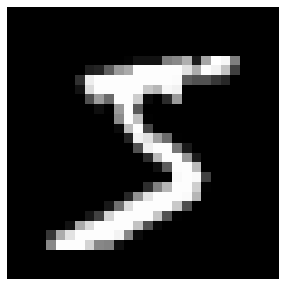

In [2]:
import matplotlib.pyplot as plt

def plot_image(data,idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx],cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train,0)

In [3]:
print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())

0 255
0 255


In [4]:
# 입력 이미지 픽셀 값 정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
# mnist 데이터셋에 색상을 나타내는 채널 추가

print(x_train.shape,x_valid.shape)

x_train_in = x_train[...,tf.newaxis] # 채널을 추가하고자 하는 위치에 tf.newaxis
x_valid_in = x_valid[...,tf.newaxis] # 마지막 축에 채널 추가

print(x_train_in.shape,x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2. Sequential API로 모델 생성 및 학습

<img src = "https://drive.google.com/uc?id=1Ao4wKbUB2L7sUMYLG_Pw2Dfj4KpnLt_o" height = 300 width = 600>



In [8]:
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1),name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2),name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')])

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train_in, y_train, validation_data=(x_valid_in,y_valid),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2121 - accuracy: 0.9401 - val_loss: 0.0854 - val_accuracy: 0.9750
Epoch 2/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0762 - accuracy: 0.9780 - val_loss: 0.0635 - val_accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0583 - accuracy: 0.9830 - val_loss: 0.0586 - val_accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0544 - val_accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0399 - accuracy: 0.9880 - val_loss: 0.0511 - val_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0557 - val_accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.0516 -

두 번째 epoch만 마쳐도 훈련 셋, 검증 셋 모두 97%에 가까운 정확도를 보인다.

In [11]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 7ms/step - loss: 0.0583 - accuracy: 0.9834


[0.05825130641460419, 0.9833999872207642]

검증 셋에 대해 약 98%의 정확도를 나타낸다.

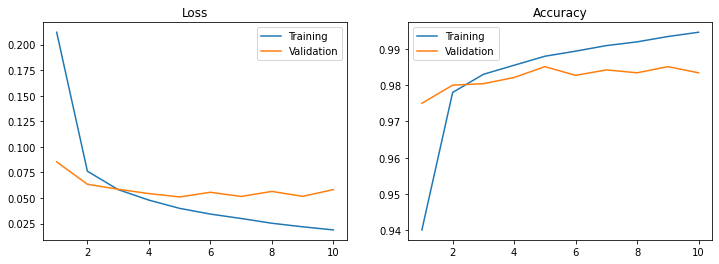

In [10]:
# 10 epoch 동안 모델의 예측 오차와 정확도를 그래프로 그리는 함수 정의

def plot_loss_acc(history, epoch):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    
    axes[0].plot(range(1, epoch+1), loss, label = 'Training')
    axes[0].plot(range(1, epoch+1), val_loss, label = "Validation")
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch+1), acc, label = 'Training')
    axes[1].plot(range(1, epoch+1), val_acc, label = "Validation")
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')
    
    plt.show()
    
plot_loss_acc(history, 10)

validation loss가 낮아지지 않는 4 epoch 이후부터는 모델이 과대적합됨.

### 2-3. 모델 구조 파악

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


* Conv2D : 입력 텐서 (28,28,1) -> (26,26,32), (3,3) 크기의 합성곱 필터를 사용하여 이미지 가로, 세로가 2씩 줄어듦, 서로 다른 32개의 필터를 적용하여 (26,26,32)

* 풀링 레이어 : (26,26,32) -> (13,13,32), (2,2) 크기의 풀링 레이어 적용

* Flatten : 13 X 13 X 32 = 5408개 원소를 갖는 1차원 벡터가 됨

In [13]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

None : 배치 크기가 들어오는 위치(어떤 값이든 가능)

In [14]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [15]:
# 레이어
model.layers

In [16]:
# 첫 번째 레이어 선택
model.layers[0]

In [17]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
# 첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [19]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 3.07420284e-01,  2.73873746e-01, -9.00000453e-01,
            1.85637563e-01, -4.48477298e-01, -9.93193865e-01,
           -4.22096252e-01,  6.18492067e-01, -9.75001752e-01,
           -3.60123485e-01,  1.34858815e-02,  3.78745109e-01,
           -9.91552949e-01,  1.92878917e-01,  1.07293177e+00,
            2.67333150e-01, -2.88151950e-01, -3.84634852e-01,
            3.05228353e-01,  2.63993174e-01,  3.25941861e-01,
           -2.62336195e-01, -1.13064252e-01,  1.58220455e-01,
            1.29078016e-01, -6.32371902e-02,  1.05933741e-01,
            4.30973321e-01, -3.63702998e-02,  2.67556757e-01,
           -4.71979380e-01, -2.42031440e-01]],
 
         [[-1.37615567e-02,  7.42438212e-02, -6.11001968e-01,
            6.62914887e-02,  8.08539987e-03, -1.91797033e-01,
            3.43245447e-01,  2.07778171e-01, -1.09972467e-03,
           -3.93971428e-02,  6.59930885e-01,  4.26048249e-01,
           

* 첫 번째 변수 : 커널 행렬의 가중치
  (3,3,1,32) : (3,3)은 필터 크기, 1은 입력층 채널 개수, 32는 출력층 채널 개수이므로 업데이트 가능한 파라미터 = 3 x 3 x 1 x 32 = 288개

* 두 번째 변수 : 각 커널의 상수항(bias)
  (32,) : 출력층의 채널 수

* 총 학습 가능 파라미터 = 288 + 32 = 320개

In [20]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 3.07420284e-01,  2.73873746e-01, -9.00000453e-01,
           1.85637563e-01, -4.48477298e-01, -9.93193865e-01,
          -4.22096252e-01,  6.18492067e-01, -9.75001752e-01,
          -3.60123485e-01,  1.34858815e-02,  3.78745109e-01,
          -9.91552949e-01,  1.92878917e-01,  1.07293177e+00,
           2.67333150e-01, -2.88151950e-01, -3.84634852e-01,
           3.05228353e-01,  2.63993174e-01,  3.25941861e-01,
          -2.62336195e-01, -1.13064252e-01,  1.58220455e-01,
           1.29078016e-01, -6.32371902e-02,  1.05933741e-01,
           4.30973321e-01, -3.63702998e-02,  2.67556757e-01,
          -4.71979380e-01, -2.42031440e-01]],

        [[-1.37615567e-02,  7.42438212e-02, -6.11001968e-01,
           6.62914887e-02,  8.08539987e-03, -1.91797033e-01,
           3.43245447e-01,  2.07778171e-01, -1.09972467e-03,
          -3.93971428e-02,  6.59930885e-01,  4.26048249e-01,
           5.01753509e-01,  

In [21]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.28559294, -0.31399885, -0.14641023, -0.2700943 , -0.09332314,
       -0.08717757, -0.22094922,  0.0345789 ,  0.00067012, -0.23798604,
       -0.02284987, -0.02499668,  0.10575819,  0.15651794, -0.00398857,
       -0.29814923, -0.17054561, -0.01614953, -0.2609797 , -0.21081929,
       -0.28089982, -0.2592687 , -0.19874893, -0.20345676, -0.05113345,
       -0.2403579 , -0.13780631, -0.38149   , -0.05011002, -0.21574515,
       -0.22242635, -0.1485757 ], dtype=float32)>

In [22]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [23]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(1, 2번째 레이어)

# 모델에 입력 데이터를 넣어주고, 모델의 1, 2번째 레이어의 출력을 최종 출력으로 갖는 activator 모델 정의
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis,...])
len(activations)

1/1 [==============================] - 0s 77ms/step


2

In [24]:
# 첫번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

* 1 : 입력 이미지의 개수(샘플이 1개)

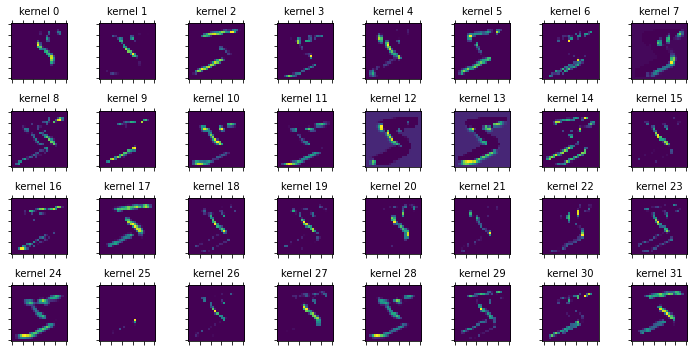

In [25]:
# 첫 번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible = False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible = False)
    
plt.tight_layout()
plt.show()

In [26]:
# 두번째 레이어 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


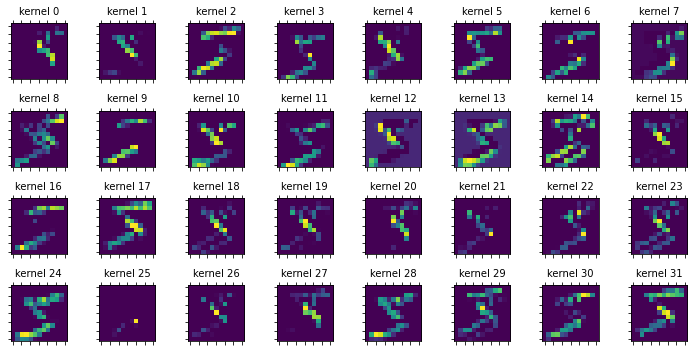

In [27]:
# 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible = False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible = False)
    
plt.tight_layout()
plt.show()

* conv 출력 이미지에 비해 화소 크기가 굵어짐

* 최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러냄

## 03. 복잡한 모델 생성





### 3-1. 데이터셋 준비

In [28]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape) 
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [30]:
# 새로운 출력 값 배열 생성(홀수 : 1, 짝수 : 0)

import numpy as np

y_train_odd = []
for y in y_train:
  if y % 2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)
y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [31]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [32]:
# validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [33]:
# 정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2. Functional API로 다중 입력, 출력 레이어 생성

In [34]:
# Functional API를 이용하여 모델 생성
inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

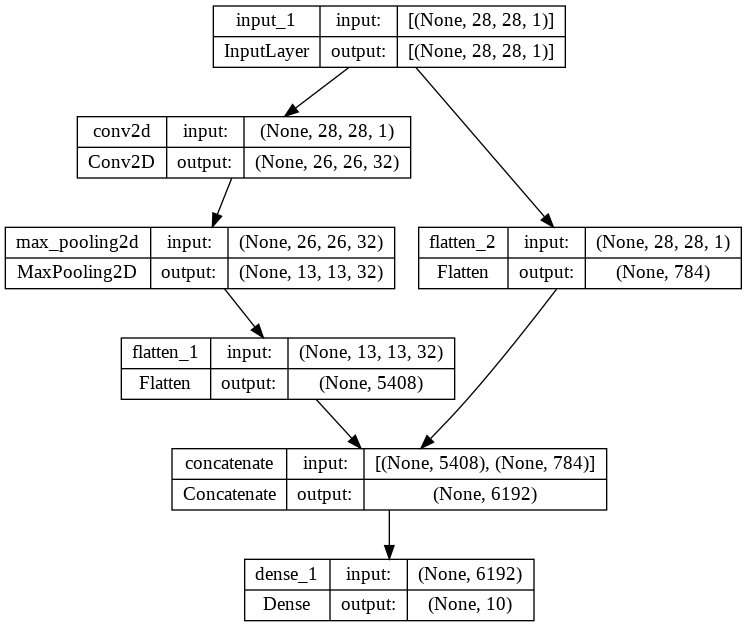

In [35]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [36]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid),
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1979 - accuracy: 0.9444 - val_loss: 0.0843 - val_accuracy: 0.9749
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0767 - accuracy: 0.9779 - val_loss: 0.0626 - val_accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0595 - accuracy: 0.9815 - val_loss: 0.0564 - val_accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0484 - accuracy: 0.9852 - val_loss: 0.0569 - val_accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0403 - accuracy: 0.9880 - val_loss: 0.0606 - val_accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.0542 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0581 -

### 3-3. 다중 출력 분류 모델

* 2가지 서로 다른 분류 문제를 예측하는 다중 출력 모델 만들기

* 각기 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만들어야 함

In [37]:
# Functional API를 이용하여 모델 생성
inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flaten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)
odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flaten_layer (Flatten)         (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [38]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


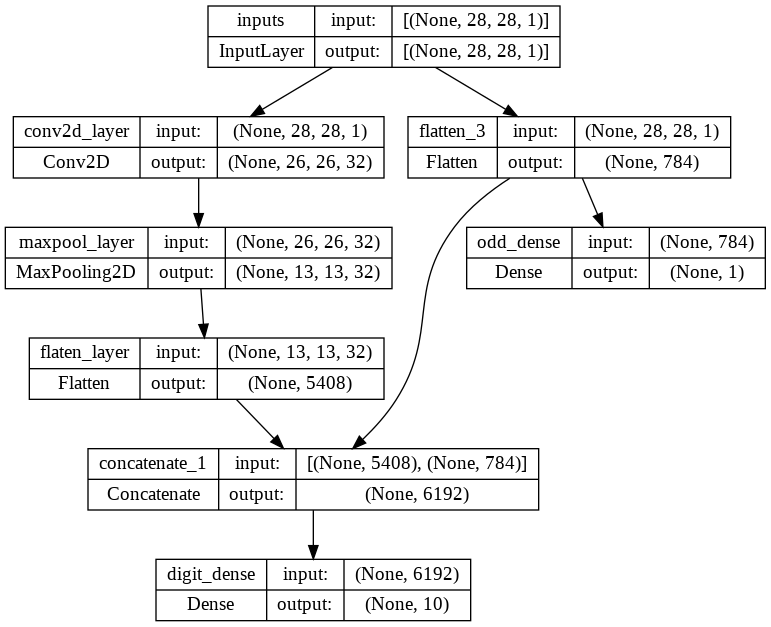

In [39]:
# 모델 구조
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

* 컴파일 시, 모델을 정의할 때 출력 Dense 레이어에 name 속성으로 지정한 이름을 key로 하고, 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정

* fit 수행 시, 출력값을 2개 지정하고 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력해야 함

In [40]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy',
                                      'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              # loss = 1.0*sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},{'digit_dense':y_train, 'odd_dense':y_train_odd},
                    validation_data = ({'inputs':x_valid_in}, {'digit_dense':y_valid,'odd_dense':y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3592 - digit_dense_loss: 0.1982 - odd_dense_loss: 0.3219 - digit_dense_accuracy: 0.9433 - odd_dense_accuracy: 0.8655 - val_loss: 0.2354 - val_digit_dense_loss: 0.0978 - val_odd_dense_loss: 0.2753 - val_digit_dense_accuracy: 0.9696 - val_odd_dense_accuracy: 0.8891
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2170 - digit_dense_loss: 0.0814 - odd_dense_loss: 0.2712 - digit_dense_accuracy: 0.9754 - odd_dense_accuracy: 0.8918 - val_loss: 0.2083 - val_digit_dense_loss: 0.0739 - val_odd_dense_loss: 0.2688 - val_digit_dense_accuracy: 0.9772 - val_odd_dense_accuracy: 0.8945
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1927 - digit_dense_loss: 0.0615 - odd_dense_loss: 0.2624 - digit_dense_accuracy: 0.9811 - odd_dense_accuracy: 0.8956 - val_loss: 0.1976 - val_digit_dense_loss: 0.0669 - val_odd_dense_loss: 0.2613 - val_digit_dense_accuracy: 0.9779 -

In [41]:
# 모델 성능
model.evaluate({'inputs':x_train_in},{'digit_dense':y_train, 'odd_dense':y_train_odd})

1875/1875 [==============================] - 16s 9ms/step - loss: 0.1450 - digit_dense_loss: 0.0193 - odd_dense_loss: 0.2514 - digit_dense_accuracy: 0.9936 - odd_dense_accuracy: 0.9022


[0.1450330913066864,
 0.019327683374285698,
 0.25141090154647827,
 0.9936333298683167,
 0.9022166728973389]

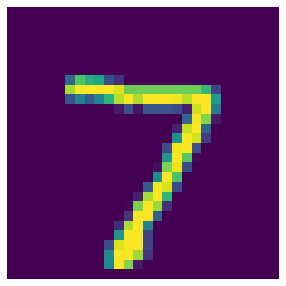

In [42]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [43]:
# 검증 데이터셋의 모든 이미지 데이터를 입력해서 2개의 분류 문제에 대한 예측 확률 구하기
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 4s 12ms/step
[1.8523837e-12 1.2556936e-10 4.8613806e-09 9.9123426e-06 2.8308814e-11
 1.8588254e-12 2.7526499e-21 9.9999005e-01 3.5385906e-08 1.4311295e-09]
[0.9996275]


In [44]:
# argmax로 예측 확률을 실제 정답 레이블로 변환
digit_labels = np.argmax(digit_preds,axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [45]:
# 홀수, 짝수 여부에 대한 예측 레이블 출력
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1,-1)[0] # 임계값 0.5
odd_labels[0:10]

<ipython-input-45-b781d64fe21f>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1,-1)[0] # 임계값 0.5


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

### 3-4. 전이 학습(transfer learning)

* 기존에 학습된 모델을 활용해 새로운 모델을 만들어 냄

In [48]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flaten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input,outputs=base_model_output,name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flaten_layer (Flatten)      (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


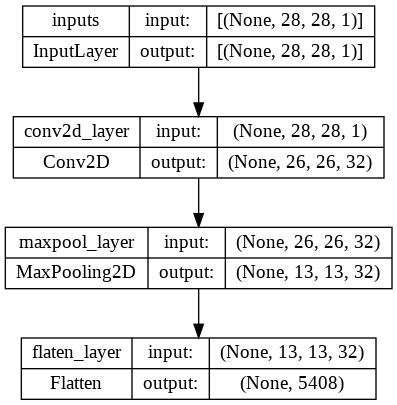

In [49]:
# 모델 구조
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [50]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
    base_model, # 앞서 정의한 base_model 레이어로 추가
    tf.keras.layers.Dense(10, activation='softmax'), # 최종 분류기 역할의 Dense 레이어 추가
])

digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


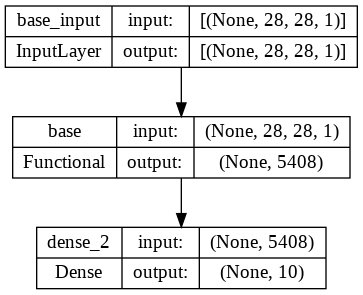

In [51]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

최종적으로 노드 10개를 가진 분류기 역할을 하는 Dense 레이어가 추가됨

In [52]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                    validation_data = (x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1285 - accuracy: 0.9639 - val_loss: 0.0713 - val_accuracy: 0.9767
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0592 - accuracy: 0.9819 - val_loss: 0.0526 - val_accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0449 - accuracy: 0.9862 - val_loss: 0.0574 - val_accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0510 - val_accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0614 - val_accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0241 - accuracy: 0.9925 - val_loss: 0.0558 - val_accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0536 -

In [53]:
# 베이스 모델의 가중치 고정(Freeze Model)
base_model_frozen = tf.keras.models.Model(inputs=model.input,outputs=base_model_output,name='base_frozen')
base_model_frozen.trainable = False # 모델의 파라미터 값 고정
base_model_frozen.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f7b8d257b20>>

In [54]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs = base_model_frozen.input,
                                           outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flaten_layer (Flatten)      (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [55]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                                 validation_data = (x_valid_in, y_valid),
                                  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1172 - accuracy: 0.9681 - val_loss: 0.0606 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0495 - accuracy: 0.9853 - val_loss: 0.0494 - val_accuracy: 0.9831
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.0509 - val_accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0282 - accuracy: 0.9919 - val_loss: 0.0513 - val_accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0500 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0186 - accuracy: 0.9944 - val_loss: 0.0509 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.0525 - val

In [56]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs = model.input,
                                           outputs=base_model.output,
                                           name='base_frozen')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flaten_layer (Flatten)      (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [57]:
# 앞서 고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어 연결하여 모델 구성
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs = base_model_frozen2.input,
                                           outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flaten_layer (Flatten)      (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [58]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                                 validation_data = (x_valid_in, y_valid),
                                  epochs=10)     

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1170 - accuracy: 0.9675 - val_loss: 0.0605 - val_accuracy: 0.9818
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0498 - accuracy: 0.9850 - val_loss: 0.0517 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0364 - accuracy: 0.9890 - val_loss: 0.0495 - val_accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0547 - val_accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0507 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0563 - val_accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0576 - val_ac